# Дополнительное задание к проекту 4, Гвоздева А.

##Загружаем датасет и все необходимые библиотеки

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
import re

In [17]:
from datetime import datetime

In [23]:
%matplotlib inline

In [34]:
data=pd.read_csv('query_result_5.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             127 non-null    int64  
 1   total_sum             118 non-null    float64
 2   number_of_passengers  127 non-null    int64  
 3   number_of_seats       127 non-null    int64  
 4   fill_up               127 non-null    float64
 5   model                 127 non-null    object 
 6   flight_no             127 non-null    object 
 7   departure_airport     127 non-null    object 
 8   arrival_airport       127 non-null    object 
 9   aircraft_code         127 non-null    object 
 10  actual_departure      127 non-null    object 
 11  actual_arrival        127 non-null    object 
 12  length_of_flight      127 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 13.0+ KB


Удаляем пропуски

In [35]:
data.dropna(axis=0, inplace=True)

In [36]:
data.shape

(118, 13)

# Приступаем к решению

In [8]:
# Функция, вычисляющая время полета
def know_time(string):
    hours=int(string[0:2])
    minutes=int(string[3:5])
    return hours+minutes/60

In [9]:
# Функция, определяющая, выходной день или нет
def is_weekend(num):
    if num==5 or num==6:
        return "Yes"
    else:
        return "No"

In [37]:
# Посчитаем фактическую длительность каждого полета
data["length_of_flight"]=data["length_of_flight"].apply(know_time)

In [94]:
data.sample(5)

,flight_id,total_sum,number_of_passengers,number_of_seats,fill_up,model,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,length_of_flight,fuel_consumption,fuel_cost,revenue,date_of_flight,day_of_week,is_weekend
39,136366,1527400.0,103,130,0.792308,Boeing 737-300,PG0252,AAQ,SVO,733,2017-01-11T10:08:00Z,2017-01-11T11:47:00Z,1.650000,2600,261690.000000,1.265710e+06,2017-01-11,2,No
4,136131,1812800.0,124,130,0.953846,Boeing 737-300,PG0252,AAQ,SVO,733,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,1.650000,2600,261690.000000,1.551110e+06,2017-01-28,5,Yes
84,136669,752700.0,95,97,0.979381,Sukhoi Superjet-100,PG0480,AAQ,EGO,SU9,2017-01-17T09:26:00Z,2017-01-17T10:17:00Z,0.850000,1864,96648.400000,6.560516e+05,2017-01-17,1,No
40,136383,1493200.0,106,130,0.815385,Boeing 737-300,PG0252,AAQ,SVO,733,2017-01-25T10:09:00Z,2017-01-25T11:51:00Z,1.700000,2600,269620.000000,1.223580e+06,2017-01-25,2,No
114,136871,765300.0,97,97,1.000000,Sukhoi Superjet-100,PG0480,AAQ,EGO,SU9,2017-01-13T09:28:00Z,2017-01-13T10:18:00Z,0.833333,1864,94753.333333,6.705467e+05,2017-01-13,4,No


Нам необходимо посчитать расходы на каждый рейс. Для решения этой задачи нужны дополнительные данные. Вот они:

Стоимость авиационного керосина - 47.58 руб/литр. Плотность - 0.78 кг/л.

Расход топлива для Boeing 737-300 - 2600 кг/час.
Расход топлива для Sukhoi Superjet-100 - 1864 кг/час.

Исходя из этого рассчитаем стоимость топлива для кажого рейса

In [38]:
data["fuel_consumption"]=data["model"].apply(lambda x: 2600 if x=='Boeing 737-300' else 1864)

In [39]:
data["fuel_cost"]=(data["fuel_consumption"]*data["length_of_flight"]/0.78)*47.58

In [40]:
data["revenue"]=data["total_sum"]-data["fuel_cost"]

В датасете отсутствуют рейсы с отрицательной прибылью

In [41]:
data[data["revenue"]<0]

,flight_id,total_sum,number_of_passengers,number_of_seats,fill_up,model,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,length_of_flight,fuel_consumption,fuel_cost,revenue


У рейсов в Москву чистая прибыль больше, чем у рейсов в Белгород

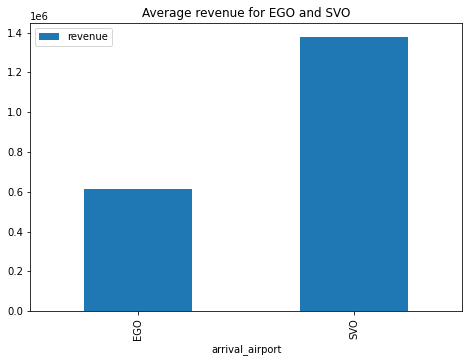

In [42]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
data.pivot_table(values=["revenue"], index="arrival_airport", aggfunc="mean").plot(kind='bar', ax=axes)
axes.set_title('Average revenue for EGO and SVO')
plt.show()

Качественный вид распределения прибыли рейсов в Москву и Белгород (revenue) практически не отличается от вида распределения доходов от продажи билетов (total_sum) из основного задания

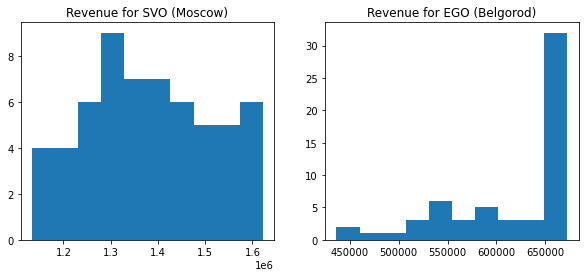

In [43]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
SVO=data[data["arrival_airport"]=='SVO']
axes[0].hist(SVO["revenue"])
axes[0].set_title("Revenue for SVO (Moscow)")

EGO=data[data["arrival_airport"]=='EGO']
axes[1].hist(EGO["revenue"])
axes[1].set_title("Revenue for EGO (Belgorod)")

plt.show()

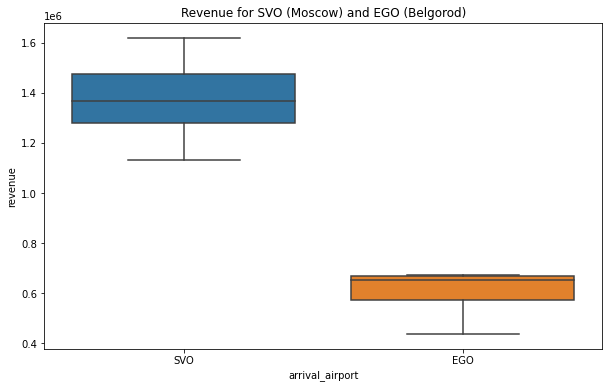

In [44]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x=data["arrival_airport"], y=data["revenue"], data=data, ax=ax)
ax.set_title('Revenue for SVO (Moscow) and EGO (Belgorod)')
plt.show()

Посмотрим на распределение прибыли в зависимости от дня недели

In [45]:
data["date_of_flight"]=data["actual_departure"].apply(lambda x: x[0:10])

In [46]:
data["date_of_flight"]=data["date_of_flight"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [47]:
data["day_of_week"]=data["date_of_flight"].dt.weekday

In [48]:
data["is_weekend"]=data["day_of_week"].apply(is_weekend)

Как мы видим, прибыль практически не зависит от того, выходной день или нет

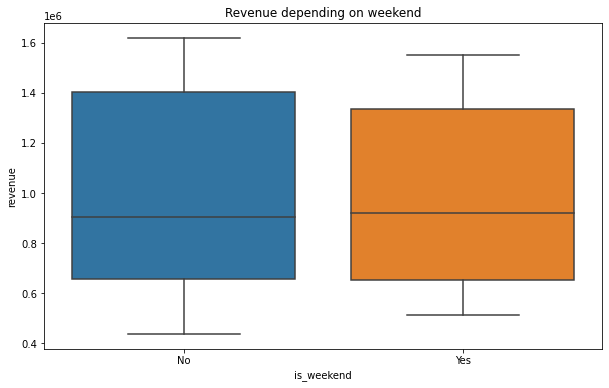

In [49]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x=data["is_weekend"], y=data["revenue"], data=data, ax=ax)
ax.set_title('Revenue depending on weekend')
plt.show()

Видно, что зависимость прибыли от направления полета (Москва или Белгород) сохраняется и в будние, и в выходные дни. 
В любой день прибыль от полета в Москву больше

<AxesSubplot:xlabel='is_weekend,arrival_airport'>

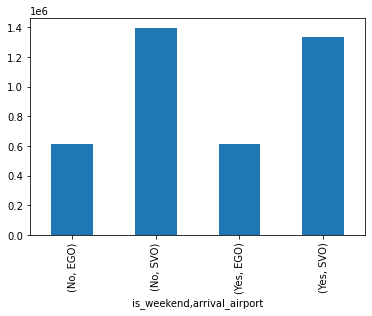

In [50]:
data.groupby(["is_weekend","arrival_airport"])["revenue"].mean().plot(kind='bar')

Ну а теперь мы должны "выбросить" наименее прибыльные рейсы.


Это - список десяти наименее прибыльных рейсов во всем датасете. Можем выбросить их. 

In [51]:
data[["flight_id","revenue"]].sort_values("revenue")[:10]

,flight_id,revenue
102,136807,436246.666667
77,136642,438141.733333
109,136844,480346.666667
116,136887,502341.733333
120,136922,513046.666667
74,136620,520641.733333
105,136823,523751.600000
123,136937,531346.666667
117,136888,531346.666667
78,136645,536351.600000


А еще мы можем разделить рейсы по направлениям (Москва или Белгород) и выбросить наименее прибыльные рейсы по каждому направлению.

In [52]:
data[data["arrival_airport"]=="SVO"][["flight_id","revenue"]].sort_values("revenue")[:5]

,flight_id,revenue
54,136464,1.133667e+06
21,136250,1.140823e+06
2,136122,1.166667e+06
12,136178,1.172910e+06
38,136360,1.191067e+06


In [53]:
data[data["arrival_airport"]=="EGO"][["flight_id","revenue"]].sort_values("revenue")[:5]

,flight_id,revenue
102,136807,436246.666667
77,136642,438141.733333
109,136844,480346.666667
116,136887,502341.733333
120,136922,513046.666667


А еще можно выбросить рейсы с заполняемостью менее 75% по каждому направлению.

In [54]:
data[(data["arrival_airport"]=='SVO')&(data["fill_up"]<0.75)][["flight_id","fill_up"]]

,flight_id,fill_up
2,136122,0.746154
38,136360,0.746154


In [55]:
data[(data["arrival_airport"]=='EGO')&(data["fill_up"]<0.75)][["flight_id","fill_up"]]

,flight_id,fill_up
77,136642,0.659794
102,136807,0.701031


Как видно из приведенных данных, рейсы в Белгород с ID 136642, 136807 встречаются как среди рейсов с наименьшей прибылью, так и среди рейсов с наименьшей заполняемостью. Значит, их точно необходимо выбросить.

То же самое с рейсами в Москву. Рейсы с ID 136122, 136360 встречаются как среди рейсов с наименьшей прибылью, так и среди рейсов с наименьшей наполняемостью. Значит, их тоже выбрасываем.

# Выводы
1. Был проанализирован датасет, содержащий информацию о полетах из Анапы в зимнее время. Всего в датасете находилось 118 записей. Для анализа датасета были использованы дополнительные данные из сторонних источников (стоимость топлива, расход топлива для каждой модели самолета, плотность топлива)
2. Было показано, что полеты в Москву приносят больше прибыли, чем полеты в Белгород
3. Были найдены 2 рейса в Белгород с заполняемостью ниже 75% (136642, 136807) и 2 рейса в Москву с заполняемостью ниже 75% (136122, 136360).
4. После сортировки данных по прибыли по каждому направлению было принято решение удалить рейсы с наименьшей наполняемостью (136642, 136807, 136122, 136360), т.к. именно эти рейсы приносят наименьшую прибыль по каждому из направлений.